In [1]:
import torchaudio
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# Sample wav file

In [2]:
wavPath = 'datasets/wav/audio1.wav'

# Waveform

Read and plot the waveform of a wav file.

torch.Size([1, 565099])


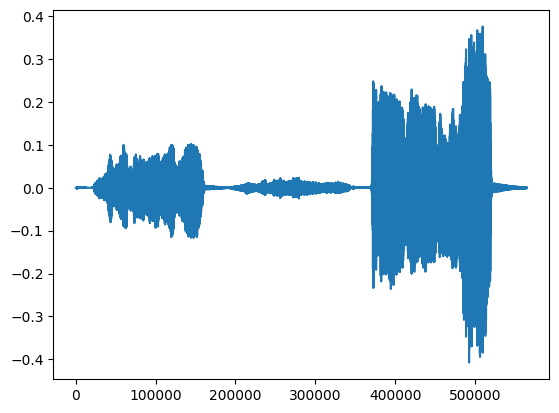

In [3]:
x, fs = torchaudio.load(wavPath, format='wav')
print(x.shape)
plt.plot(x.t().numpy())

# Power spectrogram

Extract the power spectrogram of a wav file with a 25ms window and 10ms shift using the Short-Time Fourier Transform (STFT).

torch.Size([1, 257, 3532])


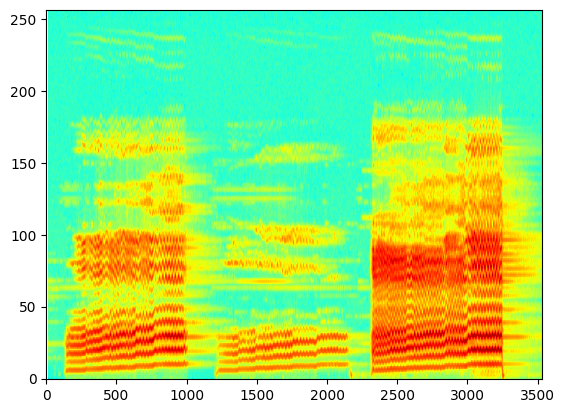

In [4]:
specgram = torchaudio.transforms.Spectrogram(
    n_fft=512, win_length=25*16, hop_length=10*16)(x)       # 25ms window, 10ms shift
print(specgram.shape)
plt.imshow(specgram.log()[0].numpy(), cmap='jet', aspect='auto',origin='lower') 

# Mel-spectrogram

Extract the mel-spectrogram of a wav file with a 25ms window and 10ms shift using the Short-Time Fourier Transform (STFT) and
a mel filterbank with 80 filters.

torch.Size([1, 80, 3532])


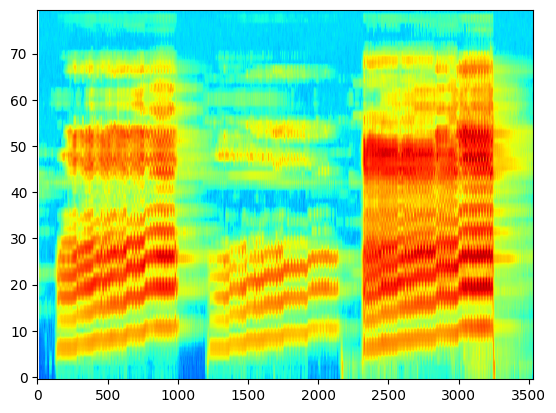

In [5]:
melspecgram = torchaudio.transforms.MelSpectrogram(
    n_fft=512, win_length=25*16, hop_length=10*16, n_mels=80)(x)       # 25ms window, 10ms shift
print(melspecgram.shape)
plt.imshow(melspecgram.log()[0].numpy(), cmap='jet', aspect='auto',origin='lower')

# MFCC

Extract the mel-frequency cepstral coefficients (MFCC) of a wav file with a 25ms window and 10ms shift using the Short-Time Fourier Transform (STFT) and

torch.Size([1, 40, 3530])


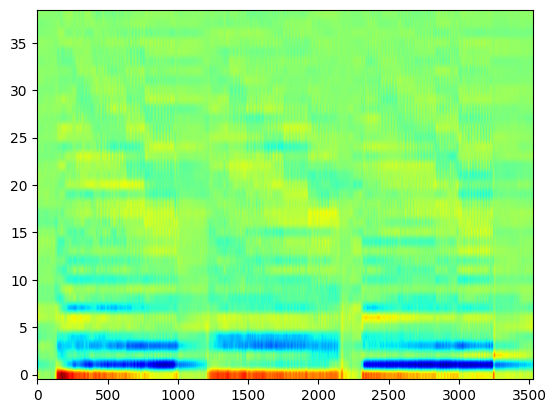

In [6]:
mfcc = torchaudio.transforms.MFCC(
    melkwargs={"n_fft": 25*16, "hop_length": 10*16, "n_mels": 48, "center": False},       # 25ms window, 10ms shift
    n_mfcc=40, log_mels=True)(x)
print(mfcc.shape)
plt.imshow(mfcc[0,1:].numpy(), cmap='jet', aspect='auto',origin='lower')

# Real cepstrum

Extract the real cepstrum of a wav file with a 25ms window and 10ms shift using the Short-Time Fourier Transform (STFT).

(512, 3533) complex64
(512, 3533)


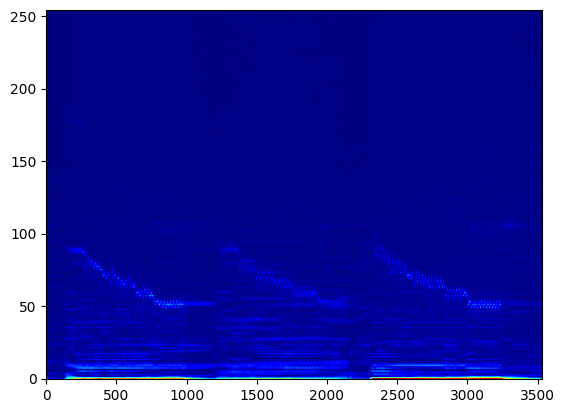

In [7]:
f, t, cspecgram = scipy.signal.stft(
    x[0].numpy(), fs=fs,
    nperseg=25*16, noverlap=25*16-10*16, nfft=512, return_onesided=False)   # 25ms window, 10ms shift
print(cspecgram.shape, cspecgram.dtype)
ceps = np.fft.ifft(np.log(np.abs(cspecgram)+1e-6), axis=0)
print(ceps.shape)
plt.imshow(np.abs(ceps)[1:256], cmap='jet', aspect='auto',origin='lower') 